<a href="https://colab.research.google.com/github/ese-msc-2022/acds-moonshot-xenophanes/blob/olya/model_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:

gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

from psutil import virtual_memory
ram_gb = virtual_memory().total / 1e9
print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

if ram_gb < 20:
  print('Not using a high-RAM runtime')
else:
  print('You are using a high-RAM runtime!')

Thu Feb  2 04:16:42 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA A100-SXM...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P0    55W / 400W |      0MiB / 40960MiB |      0%      Default |
|                               |                      |             Disabled |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [3]:
%%bash
pip install -qr https://raw.githubusercontent.com/ultralytics/yolov5/master/requirements.txt 


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.0/184.0 KB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.1 MB/s eta 0:00:00


In [2]:
%cd /content/drive/MyDrive/crater_model/
%pwd

/content/drive/MyDrive/crater_model


'/content/drive/MyDrive/crater_model'

In [5]:
%rm -Rf model
!git clone https://github.com/ultralytics/yolov5 model/

Cloning into 'model'...
remote: Enumerating objects: 15002, done.
remote: Total 15002 (delta 0), reused 0 (delta 0), pack-reused 15002
Receiving objects: 100% (15002/15002), 14.08 MiB | 18.27 MiB/s, done.
Resolving deltas: 100% (10285/10285), done.


In [3]:
# copy data 
root_dir = '/content/drive/MyDrive/crater_model/'
moon_data_dir_small = '../moon_cropped/Moon_WAC_Training/416'
moon_data_dir_medium = '../moon_cropped/Moon_WAC_Training/2048'
moon_data_dir_large = '../moon_cropped/Moon_WAC_Training/4096'
mars_data_dir = '../data'
moon_dataset_dir_small = 'moon_dataset_small'
moon_dataset_dir_medium = 'moon_dataset_medium'
moon_dataset_dir_large = 'moon_dataset_large'
mars_dataset_dir = 'mars_dataset'

from data_manager import DataManager
from model_utils import MyModel
import os


In [7]:
%ls -la ../moon_cropped/Moon_WAC_Training/2048/images | wc -l
%ls -la ../moon_cropped/Moon_WAC_Training/2048/labels | wc -l

%rm -f ../moon_cropped/Moon_WAC_Training/2048/images/.DS_Store

%ls -la ../moon_cropped/Moon_WAC_Training/2048/images | wc -l
%ls -la ../moon_cropped/Moon_WAC_Training/2048/labels | wc -l

321
321
321
321


In [8]:
# copy data over for mars
mars_data = DataManager(root_dir=root_dir,data_dir=mars_data_dir,dataset_dir = mars_dataset_dir)
mars_data.construct_dataset_tree(delete=True,predictions='mars_inference')

# model sets
mars_data.split_for_model()
mars_data.convert_csv_to_txt()

len(train_images)=560 len(val_images)=168 len(test_images)=72
len(train_labels)=560 len(val_labels)=168 len(test_labels)=72
Copying: train_images
Copying: train_labels
Copying: val_images
Copying: val_labels
Copying: test_images
Copying: test_labels
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/train csv to txt
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/val csv to txt
Converting: /content/drive/MyDrive/crater_model/mars_dataset/labels/test csv to txt


0

/content/drive/MyDrive/crater_model/mars_dataset/images/train/margaritifersinus_35_11.png


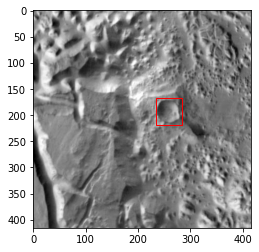

In [4]:
img = os.listdir(os.path.join(mars_dataset_dir, 'images', 'train'))[10]
img = os.path.join(root_dir, mars_dataset_dir, 'images', 'train', img)
print(img)
model = MyModel()
model.plot_test_image(img)

In [9]:
# copy data over for moons medium
moon_data_medium = DataManager(root_dir=root_dir,data_dir=moon_data_dir_medium,dataset_dir = moon_dataset_dir_medium)
moon_data_medium.construct_dataset_tree(delete=True,predictions='moon_medium_inference')

# model sets
moon_data_medium.split_for_model()
moon_data_medium.convert_csv_to_txt()

len(train_images)=224 len(val_images)=67 len(test_images)=29
len(train_labels)=224 len(val_labels)=67 len(test_labels)=29
Copying: train_images
Copying: train_labels
Copying: val_images
Copying: val_labels
Copying: test_images
Copying: test_labels
Converting: /content/drive/MyDrive/crater_model/moon_dataset_medium/labels/train csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_medium/labels/val csv to txt
Converting: /content/drive/MyDrive/crater_model/moon_dataset_medium/labels/test csv to txt


0

/content/drive/MyDrive/crater_model/moon_dataset_medium/images/train/cell131.png


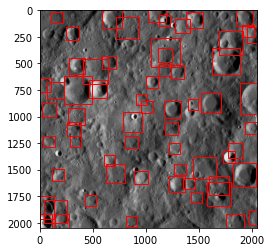

In [5]:
img = os.listdir(os.path.join(moon_dataset_dir_medium, 'images', 'train'))[10]
img = os.path.join(root_dir, moon_dataset_dir_medium, 'images', 'train', img)
print(img)

#plot example test image with lable

model = MyModel()
model.plot_test_image(img)

In [14]:
%pwd

'/content/drive/MyDrive/crater_model'

In [6]:
# training mars model 
model_dir = 'model'
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'mars.yaml'
weights = 'yolov5m.pt'
name = f'mars_yolo5m_scratch-low_32_30'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=mars.yaml, hyp=hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=model/runs/train, name=mars_yolo5m_scratch-low_32_30, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_g

In [ ]:
# visualise model findings and assess the performane
import os
from pathlib import Path

paths = sorted(Path(dirpath).iterdir(), key=os.path.getmtime)

In [7]:
# training moons medium model 
model_dir = 'model'
model_v = 'yolov5m.yaml'
hyp = 'hyp.scratch-low.yaml'
batch,epochs,workers = 32,30,24
data = 'moon_medium.yaml'
weights = 'yolov5m.pt'
name = f'moon_medium_yolo5m_scratch-low_32_30'
!python '{model_dir}/train.py' --img 416 \
                            --data '{data}'\
                            --cfg '{model_v}'\
                            --hyp '{hyp}'\
                            --weights '{weights}'\
                            --name '{name}'\
                            --batch '{batch}'\
                            --epochs '{epochs}'\
                            --workers '{workers}'

train: weights=yolov5m.pt, cfg=yolov5m.yaml, data=moon_medium.yaml, hyp=hyp.scratch-low.yaml, epochs=30, batch_size=32, imgsz=416, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=24, project=model/runs/train, name=moon_medium_yolo5m_scratch-low_32_30, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-72-g064365d Python-3.8.10 torch-1.13.1+cu116 CUDA:0 (NVIDIA A100-SXM4-40GB, 40536MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anch